# 3 - Correlation and Pattern Prediction

## prediction of only those who tried

In [1]:
import pandas as pd
import re 
import numpy as np
import seaborn as sn

In [2]:
gem = pd.read_csv('task-and-exam-marks-in-groups.csv', delimiter=";", encoding="utf-8")
del gem["Unnamed: 0"]

In [3]:
pd.options.display.max_columns = 50

In [4]:
gem.head()

,tutor,team_id,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,hash2,a1,a2,a3,a4,a5,a6,a7,punkte,note,student_id,pass,subject,semester,faculty,degree
0,tutor2,1.0,10.00,6.5,11.5,13.0,8.5,8.0,10.5,12.5,7.0,13.0,0.0,0afdc45f7ee8e52ebf1afb2970e37b36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf,1.0,tec,ba
1,tutor2,1.0,10.00,6.5,11.5,13.0,8.5,8.0,10.5,12.5,7.0,13.0,0.0,d821cd2c7b995d4e3a75c64d25e53529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,inf,1.0,tec,ba
2,tutor1,1146.0,13.75,13.5,14.5,13.5,11.0,11.5,13.5,15.0,14.5,4.0,0.0,fa873577b8543ed8a6d7d8d7fe6ca546,7.0,7.0,8.5,8.0,6.0,7.0,8.5,52.0,3.3,2.0,1.0,inf,1.0,tec,ba
3,tutor3,19.0,13.00,6.5,7.5,9.0,3.5,4.5,5.5,0.0,0.0,0.0,0.0,e7c181a90d7161b4f885a69f6d426474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,inf,1.0,tec,ba
4,tutor5,5012.0,14.00,11.5,12.5,14.5,8.0,7.0,13.5,6.5,8.5,14.0,0.0,e2be9ece8b482afb4717e4e13907a525,4.0,7.0,7.0,8.5,6.5,1.5,4.0,38.5,5.0,4.0,0.0,inf,3.0,tec,ba


## Preparation of Dataset

In [5]:
learn = gem.copy()

In [6]:
learn = learn.drop(learn[learn["punkte"] < 9.0].index)

In [7]:
learn["pass"].describe()

count    171.000000
mean       0.602339
std        0.490852
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: pass, dtype: float64

In [8]:
del learn["b6"]
del learn["b7"]
del learn["b8"]
del learn["b9"]
del learn["b10"]
del learn["b11"]
del learn["hash2"]
del learn["a1"]
del learn["a2"]
del learn["a3"]
del learn["a4"]
del learn["a5"]
del learn["a6"]
del learn["a7"]
del learn["note"]
del learn["punkte"]
del learn["student_id"]

In [9]:
target = learn["pass"]
del learn["pass"]
del learn["team_id"]

## Preparation of Evaluation

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def confusion_matrix_report(y_true, y_pred):
	cm, labels = confusion_matrix(y_true, y_pred), unique_labels(y_true, y_pred)
	column_width = max([len(str(x)) for x in labels] + [5])
	report = " " * column_width + " " + "{:_^{}}".format("Prediction", column_width * len(labels))+ "\n"
	report += " " * column_width + " ".join(["{:>{}}".format(label, column_width) for label in labels]) + "\n"
	for i, label1 in enumerate(labels):
		report += "{:>{}}".format(label1, column_width) + " ".join(["{:{}d}".format(cm[i, j], column_width) for j in range(len(labels))]) + "\n"
	return report

In [11]:
def evaluate(model, X_test, y_test):
    prediction = model.predict(X_test)
    y_pred = X_test.assign(prediction = prediction)
    y_pred = y_pred.assign(true = y_test)
    print(confusion_matrix_report(y_pred["true"], y_pred["prediction"]))
    print(accuracy_score(y_pred["true"], y_pred["prediction"]))
    print(classification_report(y_pred["true"], y_pred["prediction"]))

## Data Preparation

In [12]:
learn.columns

Index(['tutor', 'b1', 'b2', 'b3', 'b4', 'b5', 'subject', 'semester', 'faculty',
       'degree'],
      dtype='object')

In [13]:
learn_subject = learn.copy()
del learn_subject["faculty"]
learn_subject = pd.get_dummies(learn_subject)
del learn_subject["subject_ext"]
del learn_subject["degree_ext"]
learn_subject = learn_subject.replace(np.nan, "0")
learn_subject.head()

,b1,b2,b3,b4,b5,semester,tutor_tutor1,tutor_tutor2,tutor_tutor3,tutor_tutor4,tutor_tutor5,tutor_tutor6,subject_inf,subject_lehr,subject_mat,subject_mmm,subject_psy,subject_soz,subject_wip,degree_ba,degree_ma
2,13.75,13.5,14.5,13.5,11,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,14,11.5,12.5,14.5,8,3,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
5,15,14.5,15,15,15,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
6,13.5,11,13,9.5,3.5,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
7,14.5,13,12,9.5,2.5,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [14]:
learn_faculty = learn.copy()
del learn_faculty["subject"]
learn_faculty = pd.get_dummies(learn_faculty)
del learn_faculty["faculty_ext"]
del learn_faculty["degree_ext"]
learn_faculty = learn_faculty.replace(np.nan, "0")
learn_faculty.head()

,b1,b2,b3,b4,b5,semester,tutor_tutor1,tutor_tutor2,tutor_tutor3,tutor_tutor4,tutor_tutor5,tutor_tutor6,faculty_eco,faculty_hum,faculty_soc,faculty_tec,degree_ba,degree_ma
2,13.75,13.5,14.5,13.5,11,1,1,0,0,0,0,0,0,0,0,1,1,0
4,14,11.5,12.5,14.5,8,3,0,0,0,0,1,0,0,0,0,1,1,0
5,15,14.5,15,15,15,1,0,0,0,0,1,0,0,0,0,1,1,0
6,13.5,11,13,9.5,3.5,1,0,0,1,0,0,0,0,0,0,1,1,0
7,14.5,13,12,9.5,2.5,1,0,0,0,1,0,0,0,0,0,1,1,0


In [15]:
learn_only = learn.copy()
del learn_only["faculty"]
del learn_only["tutor"]
del learn_only["subject"]
learn_only = pd.get_dummies(learn_only)
del learn_only["degree_ext"]
learn_only = learn_only.replace(np.nan, "0")
learn_only.head()

,b1,b2,b3,b4,b5,semester,degree_ba,degree_ma
2,13.75,13.5,14.5,13.5,11,1,1,0
4,14,11.5,12.5,14.5,8,3,1,0
5,15,14.5,15,15,15,1,1,0
6,13.5,11,13,9.5,3.5,1,1,0
7,14.5,13,12,9.5,2.5,1,1,0


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(learn_subject, target, test_size=0.15, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(learn_faculty, target, test_size=0.15, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(learn_only, target, test_size=0.15, random_state=42)
print(X_train3.shape, y_train3.shape)
print(X_test3.shape, y_test3.shape)

(145, 8) (145,)
(26, 8) (26,)


In [17]:
y_train.describe()

count    145.000000
mean       0.613793
std        0.488567
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: pass, dtype: float64

# Naive Bayes (as Baseline Model)

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB(priors=None)

In [20]:
evaluate(naive_bayes, X_test, y_test)

      Prediction
       0.0   1.0
  0.0   12     0
  1.0   11     3

0.576923076923
             precision    recall  f1-score   support

        0.0       0.52      1.00      0.69        12
        1.0       1.00      0.21      0.35        14

avg / total       0.78      0.58      0.51        26



In [21]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train2, y_train2)
evaluate(naive_bayes, X_test2, y_test2)

      Prediction
       0.0   1.0
  0.0    7     5
  1.0    1    13

0.769230769231
             precision    recall  f1-score   support

        0.0       0.88      0.58      0.70        12
        1.0       0.72      0.93      0.81        14

avg / total       0.79      0.77      0.76        26



In [22]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train3, y_train3)
evaluate(naive_bayes, X_test3, y_test3)

      Prediction
       0.0   1.0
  0.0    8     4
  1.0    0    14

0.846153846154
             precision    recall  f1-score   support

        0.0       1.00      0.67      0.80        12
        1.0       0.78      1.00      0.88        14

avg / total       0.88      0.85      0.84        26



# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
evaluate(model1, X_test, y_test)

      Prediction
       0.0   1.0
  0.0    6     6
  1.0    1    13

0.730769230769
             precision    recall  f1-score   support

        0.0       0.86      0.50      0.63        12
        1.0       0.68      0.93      0.79        14

avg / total       0.76      0.73      0.72        26



In [26]:
pd.DataFrame(list(zip(X_train.columns, np.transpose(model1.coef_))))

,0,1
0,b1,[-0.169662518188]
1,b2,[0.151263476398]
2,b3,[0.0563143999389]
3,b4,[-0.0231724541457]
4,b5,[0.00925514403336]
5,semester,[0.288721856974]
6,tutor_tutor1,[-0.614663771677]
7,tutor_tutor2,[-0.358459878471]
8,tutor_tutor3,[-0.438122240787]
9,tutor_tutor4,[-0.445829238114]


## with small(er) dataset

In [27]:
model2 = LogisticRegression()
model2.fit(X_train2, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
evaluate(model2, X_test2, y_test2)

      Prediction
       0.0   1.0
  0.0    6     6
  1.0    1    13

0.730769230769
             precision    recall  f1-score   support

        0.0       0.86      0.50      0.63        12
        1.0       0.68      0.93      0.79        14

avg / total       0.76      0.73      0.72        26



In [29]:
pd.DataFrame(list(zip(X_train2.columns, np.transpose(model2.coef_))))

,0,1
0,b1,[-0.175316780708]
1,b2,[0.151917953194]
2,b3,[0.0627428111865]
3,b4,[-0.0192895691798]
4,b5,[0.00712157524374]
5,semester,[0.222952922644]
6,tutor_tutor1,[-0.638372609292]
7,tutor_tutor2,[-0.310764959969]
8,tutor_tutor3,[-0.439078019735]
9,tutor_tutor4,[-0.46840852592]


## Only with Homeworks and Semester

In [30]:
model3 = LogisticRegression()
model3.fit(X_train3, y_train3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
evaluate(model3, X_test3, y_test3)

      Prediction
       0.0   1.0
  0.0    6     6
  1.0    0    14

0.769230769231
             precision    recall  f1-score   support

        0.0       1.00      0.50      0.67        12
        1.0       0.70      1.00      0.82        14

avg / total       0.84      0.77      0.75        26



In [32]:
pd.DataFrame(list(zip(X_train3.columns, np.transpose(model3.coef_))))

,0,1
0,b1,[-0.169966594756]
1,b2,[0.139146285088]
2,b3,[0.0663124771063]
3,b4,[-0.022396295217]
4,b5,[0.0134817201519]
5,semester,[0.156816673214]
6,degree_ba,[1.8742792371]
7,degree_ma,[1.72672413338]


# Decision Tree

In [33]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
from sklearn.model_selection import StratifiedKFold
cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
from sklearn.model_selection import cross_val_score
acc_each_split = cross_val_score(decision_tree, learn_subject, target, cv=cross_val, scoring='accuracy')

In [34]:
# for depth in [1,2,3,4,5,6,7,8,9]:    
# 	decision_tree = tree.DecisionTreeClassifier(max_depth=depth)
# 	cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# 	acc_each_split = cross_val_score(decision_tree, learn_subject, target, cv=cross_val, scoring='accuracy')
# 	decision_tree.fit(learn_subject, target)
# 	print("tree with depth= {} and {} nodes has accuracy {}".format(depth, decision_tree.tree_.node_count,acc_each_split.mean()))

In [35]:
#choose 2
decision_tree = tree.DecisionTreeClassifier(max_depth=2)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [36]:
evaluate(decision_tree, X_test, y_test)

      Prediction
       0.0   1.0
  0.0    6     6
  1.0    0    14

0.769230769231
             precision    recall  f1-score   support

        0.0       1.00      0.50      0.67        12
        1.0       0.70      1.00      0.82        14

avg / total       0.84      0.77      0.75        26



In [37]:
importance =  decision_tree.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, 
                          columns=["Importance"])
importance

,Importance
b1,0.000000
b2,0.000000
b3,0.190001
b4,0.000000
b5,0.000000
semester,0.809999
tutor_tutor1,0.000000
tutor_tutor2,0.000000
tutor_tutor3,0.000000
tutor_tutor4,0.000000


## Testing on small(er) Data

In [38]:
for depth in [1,2,3,4,5,6,7,8,9]:    
	decision_tree = tree.DecisionTreeClassifier(max_depth=depth)
	cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
	acc_each_split = cross_val_score(decision_tree, X_train2, y_train2, cv=cross_val, scoring='accuracy')
	decision_tree.fit(X_train2, y_train2)
	print("tree with depth= {} and {} nodes has accuracy {}".format(depth, decision_tree.tree_.node_count,acc_each_split.mean()))

tree with depth= 1 and 3 nodes has accuracy 0.7935164835164835
tree with depth= 2 and 5 nodes has accuracy 0.7935164835164835
tree with depth= 3 and 9 nodes has accuracy 0.752087912087912
tree with depth= 4 and 13 nodes has accuracy 0.7101831501831503
tree with depth= 5 and 21 nodes has accuracy 0.7005128205128205
tree with depth= 6 and 31 nodes has accuracy 0.6671794871794872
tree with depth= 7 and 41 nodes has accuracy 0.6671062271062271
tree with depth= 8 and 47 nodes has accuracy 0.6538461538461539
tree with depth= 9 and 51 nodes has accuracy 0.6205860805860807


In [39]:
decision_tree = tree.DecisionTreeClassifier(max_depth=2)
decision_tree.fit(X_train2, y_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [40]:
evaluate(decision_tree, X_test2, y_test2)

      Prediction
       0.0   1.0
  0.0    6     6
  1.0    0    14

0.769230769231
             precision    recall  f1-score   support

        0.0       1.00      0.50      0.67        12
        1.0       0.70      1.00      0.82        14

avg / total       0.84      0.77      0.75        26



In [41]:
importance =  decision_tree.feature_importances_
importance = pd.DataFrame(importance, index=X_train2.columns, 
                          columns=["Importance"])
importance

,Importance
b1,0.000000
b2,0.000000
b3,0.190001
b4,0.000000
b5,0.000000
semester,0.809999
tutor_tutor1,0.000000
tutor_tutor2,0.000000
tutor_tutor3,0.000000
tutor_tutor4,0.000000


## Testing on Homework and Semester Data only

In [42]:
for depth in [1,2,3,4,5,6,7,8,9]:    
	decision_tree = tree.DecisionTreeClassifier(max_depth=depth)
	cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
	acc_each_split = cross_val_score(decision_tree, X_train3, y_train3, cv=cross_val, scoring='accuracy')
	decision_tree.fit(X_train3, y_train3)
	print("tree with depth= {} and {} nodes has accuracy {}".format(depth, decision_tree.tree_.node_count,acc_each_split.mean()))

tree with depth= 1 and 3 nodes has accuracy 0.7935164835164835
tree with depth= 2 and 5 nodes has accuracy 0.7935164835164835
tree with depth= 3 and 9 nodes has accuracy 0.752087912087912
tree with depth= 4 and 13 nodes has accuracy 0.7382783882783883
tree with depth= 5 and 21 nodes has accuracy 0.7730402930402931
tree with depth= 6 and 31 nodes has accuracy 0.7116117216117216
tree with depth= 7 and 41 nodes has accuracy 0.7044688644688645
tree with depth= 8 and 47 nodes has accuracy 0.7192307692307691
tree with depth= 9 and 53 nodes has accuracy 0.6711355311355313


In [43]:
decision_tree = tree.DecisionTreeClassifier(max_depth=2)
decision_tree.fit(X_train3, y_train3)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [44]:
evaluate(decision_tree, X_test3, y_test3)

      Prediction
       0.0   1.0
  0.0    6     6
  1.0    0    14

0.769230769231
             precision    recall  f1-score   support

        0.0       1.00      0.50      0.67        12
        1.0       0.70      1.00      0.82        14

avg / total       0.84      0.77      0.75        26



In [45]:
importance =  decision_tree.feature_importances_
importance = pd.DataFrame(importance, index=X_train3.columns, 
                          columns=["Importance"])
importance

,Importance
b1,0.000000
b2,0.000000
b3,0.190001
b4,0.000000
b5,0.000000
semester,0.809999
degree_ba,0.000000
degree_ma,0.000000


# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
# for estimators in [10, 20, 30, 40, 50, 60]:
#     for depth in [1,2,3,4,5,6,7,8,9]:    
#         rf_model =  RandomForestClassifier(max_depth=depth, n_estimators=estimators)
#         cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#         acc_each_split = cross_val_score(rf_model, X_train, y_train, cv=cross_val, scoring='accuracy')
#         rf_model.fit(X_train, y_train)
#         print("tree with depth= {} and estimators= {} has accuracy {}".format(depth, estimators, acc_each_split.mean()))

In [48]:
rf_model =  RandomForestClassifier(max_depth=8,n_estimators=60)
rf_model.fit(X_train,y_train)
evaluate(rf_model, X_test, y_test)

      Prediction
       0.0   1.0
  0.0    8     4
  1.0    1    13

0.807692307692
             precision    recall  f1-score   support

        0.0       0.89      0.67      0.76        12
        1.0       0.76      0.93      0.84        14

avg / total       0.82      0.81      0.80        26



In [49]:
# for estimators in [10, 20, 30, 40, 50, 60]:
#     for depth in [1,2,3,4,5,6,7,8,9]:    
#         rf_model2 =  RandomForestClassifier(max_depth=depth, n_estimators=estimators)
#         cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#         acc_each_split = cross_val_score(rf_model2, X_train2, y_train2, cv=cross_val, scoring='accuracy')
#         rf_model.fit(X_train2, y_train2)
#         print("tree with depth= {} and estimators= {} has accuracy {}".format(depth, estimators, acc_each_split.mean()))

In [50]:
rf_model2 =  RandomForestClassifier(max_depth=9,n_estimators=10)
rf_model2.fit(X_train2,y_train2)
evaluate(rf_model2, X_test2, y_test2)

      Prediction
       0.0   1.0
  0.0   10     2
  1.0    1    13

0.884615384615
             precision    recall  f1-score   support

        0.0       0.91      0.83      0.87        12
        1.0       0.87      0.93      0.90        14

avg / total       0.89      0.88      0.88        26



In [51]:
# for estimators in [10, 20, 30, 40, 50, 60]:
#     for depth in [1,2,3,4,5,6,7,8,9]:    
#         rf_model3 =  RandomForestClassifier(max_depth=depth, n_estimators=estimators)
#         cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#         acc_each_split = cross_val_score(rf_model3, X_train3, y_train3, cv=cross_val, scoring='accuracy')
#         rf_model.fit(X_train3, y_train3)
#         print("tree with depth= {} and estimators= {} has accuracy {}".format(depth, estimators, acc_each_split.mean()))

In [52]:
rf_model3 =  RandomForestClassifier(max_depth=8,n_estimators=20)
rf_model3.fit(X_train3,y_train3)
evaluate(rf_model3, X_test3, y_test3)

      Prediction
       0.0   1.0
  0.0    9     3
  1.0    1    13

0.846153846154
             precision    recall  f1-score   support

        0.0       0.90      0.75      0.82        12
        1.0       0.81      0.93      0.87        14

avg / total       0.85      0.85      0.84        26



In [53]:
importance =  rf_model2.feature_importances_
importance = pd.DataFrame(importance, index=X_train2.columns, 
                          columns=["Importance"])
importance

,Importance
b1,0.069491
b2,0.080939
b3,0.111871
b4,0.092113
b5,0.078781
semester,0.260802
tutor_tutor1,0.024181
tutor_tutor2,0.009339
tutor_tutor3,0.019055
tutor_tutor4,0.008170


In [54]:
import matplotlib.pyplot as plt

In [55]:
plotdata = pd.Series(range(0,160,1))
plotdata = plotdata.to_frame("weight")
plotdata["precision"] = 0
plotdata["recall"] = 0

In [56]:
for i in plotdata["weight"]:
    rf_model =  RandomForestClassifier(max_depth = 8, 
                                       n_estimators = 20, 
                                       class_weight = {0:i, 1:1}, 
                                       random_state = 42)
    rf_model.fit(X_train3,y_train3)
    #evaluate(rf_model, X_test3, y_test3)
    prediction = rf_model.predict(X_test3)
    y_pred = X_test3.assign(prediction = prediction)
    y_pred = y_pred.assign(true = y_test3)
    plotdata["recall"][plotdata["weight"] == i] = confusion_matrix(y_pred["true"], y_pred["prediction"])[0,0] / (confusion_matrix(y_pred["true"], y_pred["prediction"])[0,0] + confusion_matrix(y_pred["true"], y_pred["prediction"])[0,1])
    plotdata["precision"][plotdata["weight"] == i] = confusion_matrix(y_pred["true"], y_pred["prediction"])[0,0] / (confusion_matrix(y_pred["true"], y_pred["prediction"])[0,0] + confusion_matrix(y_pred["true"], y_pred["prediction"])[1,0])
    #print(row['weight'], row['precision'], row['recall'])

C:\Users\laris\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\laris\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
C:\Users\laris\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\laris\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

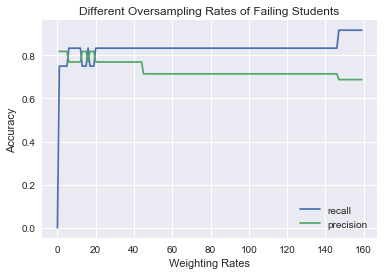

In [57]:
plt.plot(plotdata["weight"], plotdata["recall"])
plt.plot(plotdata["weight"], plotdata["precision"])
plt.title("Different Oversampling Rates of Failing Students")
plt.xlabel("Weighting Rates")
plt.ylabel("Accuracy")
plt.legend()
plt.show()